# Titanic EDA  

**Name:** Harsh Sharma  
**Task:** Task 5 – Exploratory Data Analysis  
**Dataset:** train.csv


In [6]:
# Cell: imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

# load
df = pd.read_csv('train.csv')


In [7]:
# Basic inspection
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)
print("\nMissing values:")
display(df.isnull().sum().sort_values(ascending=False))


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292



Missing values:


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [8]:
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# HasCabin
df['HasCabin'] = df['Cabin'].notnull().astype(int)

# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
# Map rare titles to "Other"
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Rev','Sir','Jonkheer','Dona','Major']
df['Title'] = df['Title'].replace(rare_titles, 'Other')
df['Title'] = df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize']==1).astype(int)

# Quick check
display(df[['HasCabin','Title','FamilySize','IsAlone']].head())


,HasCabin,Title,FamilySize,IsAlone
0,0,Mr,2,0
1,1,Mrs,2,0
2,0,Miss,1,1
3,1,Mrs,2,0
4,0,Mr,1,1


In [9]:
# Impute Age by median age per Title
title_age_median = df.groupby('Title')['Age'].median()
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_median.get(row['Title'], df['Age'].median())
    else:
        return row['Age']

df['Age'] = df.apply(fill_age, axis=1)


In [10]:
print("Missing after imputation:")
display(df.isnull().sum())

# Drop columns not needed for EDA/report (keep them if you want to engineer features)
# e.g. drop Ticket, Cabin (already used HasCabin)
df_clean = df.drop(columns=['Ticket','Cabin','Name','PassengerId'])
display(df_clean.head())


Missing after imputation:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
Title            0
FamilySize       0
IsAlone          0
dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,0,Mr,2,0
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,2,0
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,2,0
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,1,1


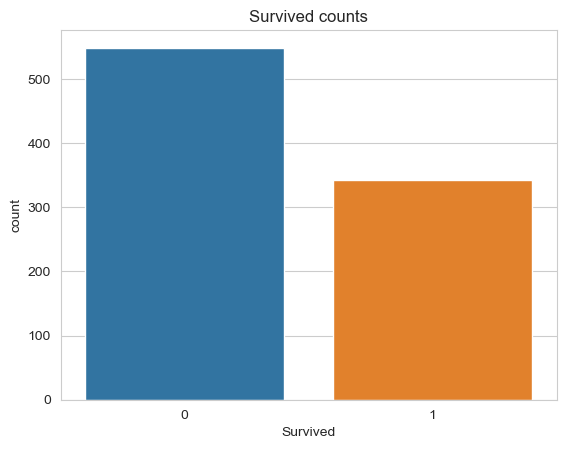

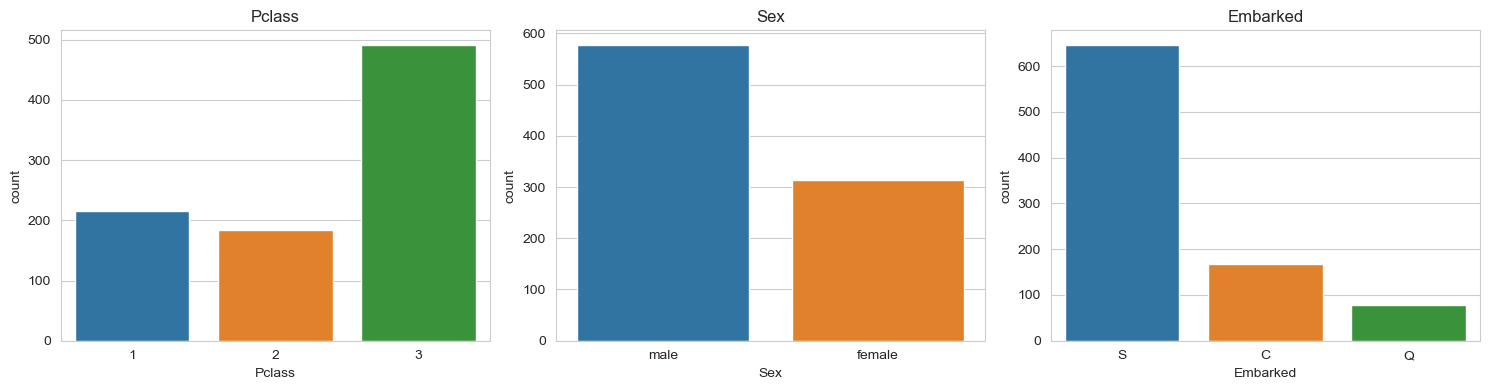

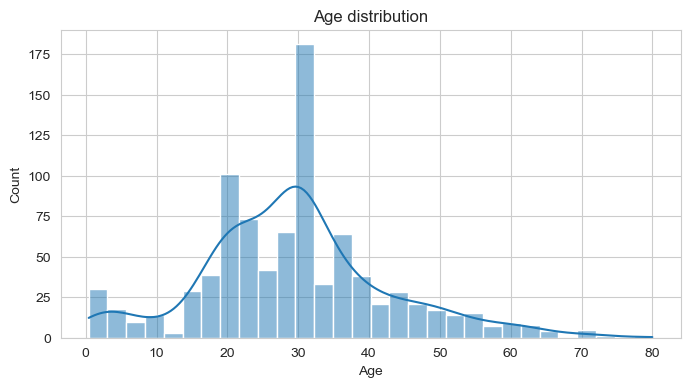

In [11]:
# Survived counts
sns.countplot(x='Survived', data=df)
plt.title('Survived counts')
plt.show()

# Pclass, Sex, Embarked counts
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.countplot(x='Pclass', data=df, ax=axes[0]); axes[0].set_title('Pclass')
sns.countplot(x='Sex', data=df, ax=axes[1]); axes[1].set_title('Sex')
sns.countplot(x='Embarked', data=df, ax=axes[2]); axes[2].set_title('Embarked')
plt.tight_layout()
plt.show()

# Age histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age distribution')
plt.show()


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


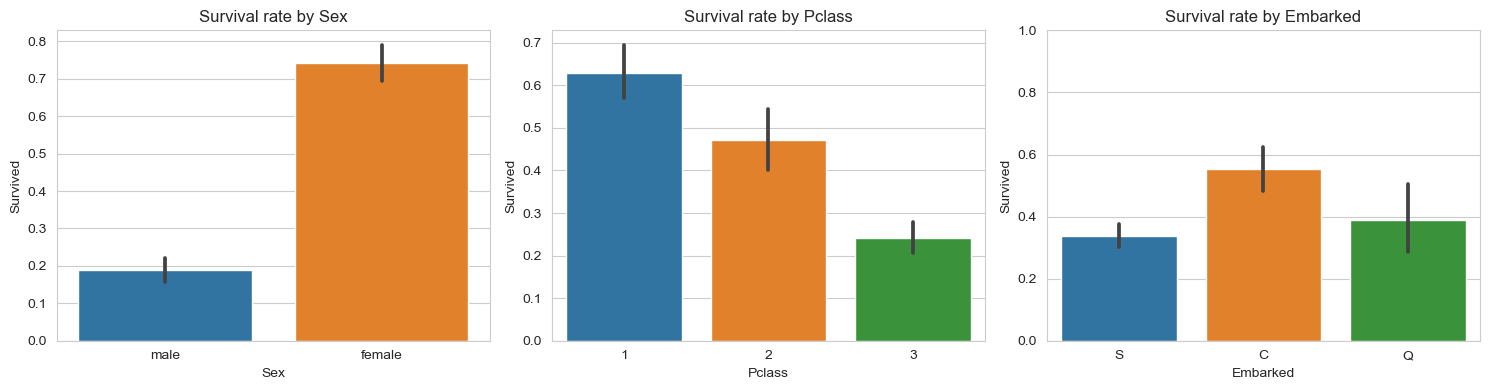

In [12]:
# Survival rate by Sex
display(pd.crosstab(df['Sex'], df['Survived'], normalize='index')*100)

# Plot survival rate by Sex, Pclass, Embarked
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0])
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[1])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[2])
axes[0].set_title('Survival rate by Sex')
axes[1].set_title('Survival rate by Pclass')
axes[2].set_title('Survival rate by Embarked')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


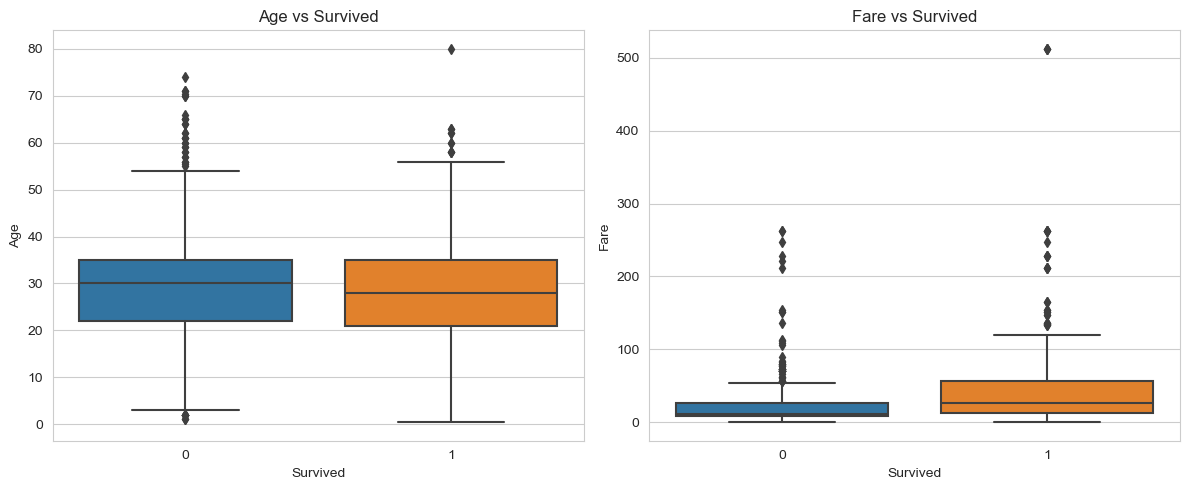

In [13]:
# Boxplots
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[0].set_title('Age vs Survived')
axes[1].set_title('Fare vs Survived')
plt.tight_layout()
plt.show()


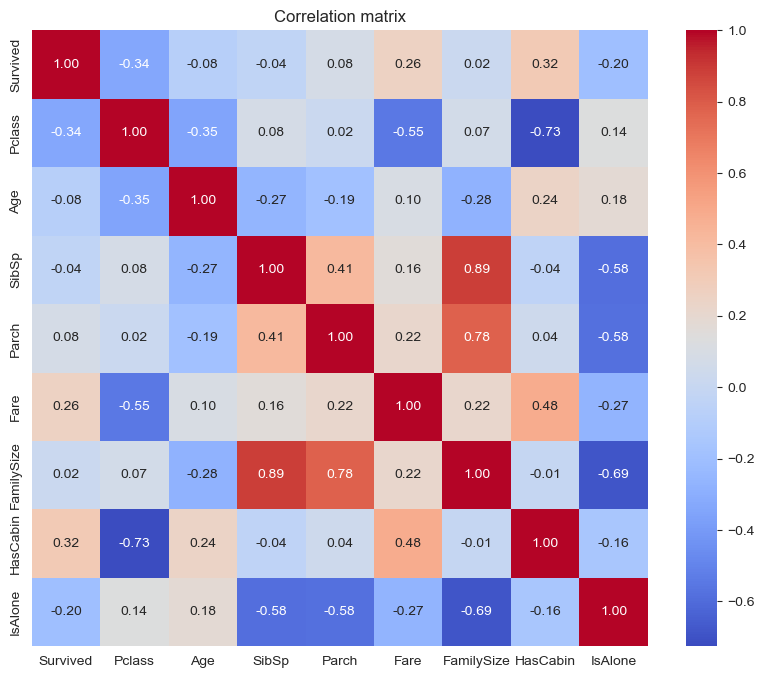

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


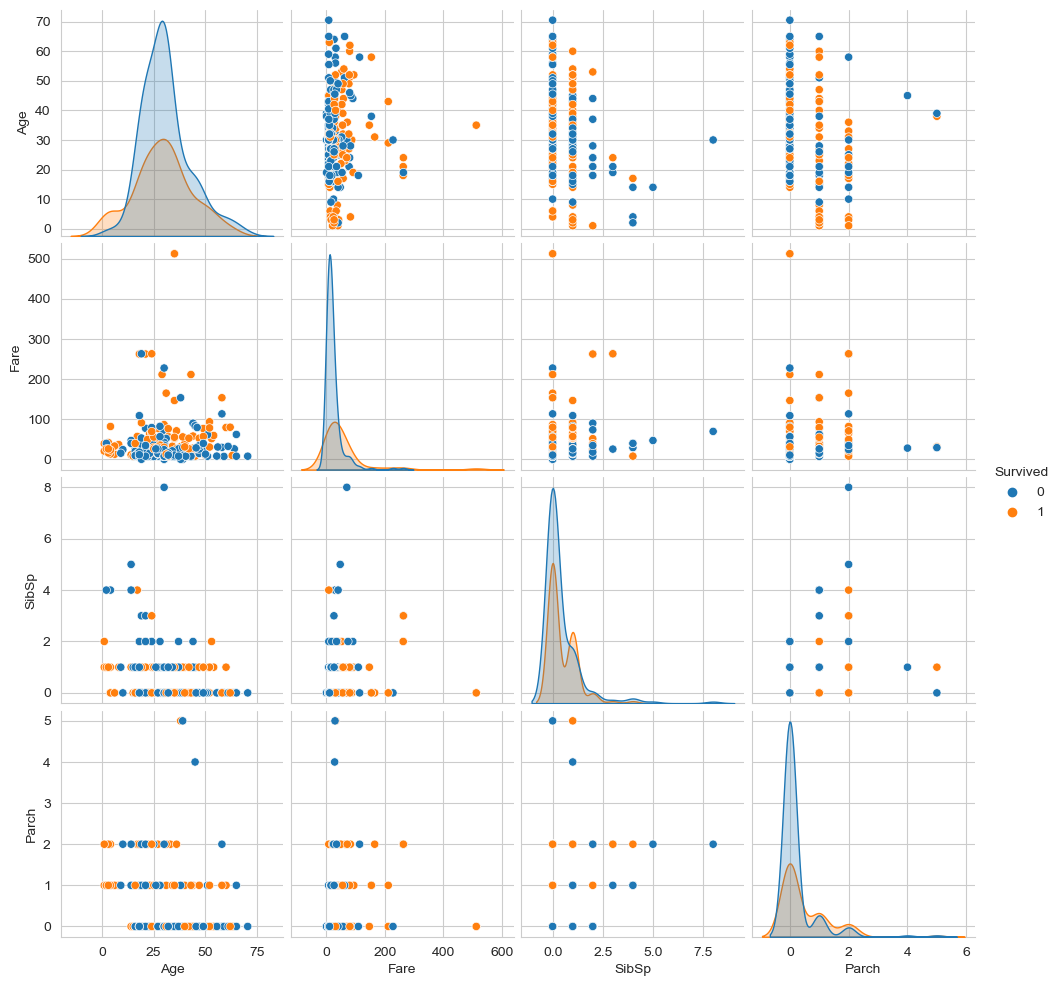

In [14]:
# Correlation heatmap
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize','HasCabin','IsAlone']
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix')
plt.show()

# Pairplot (small sample to speed up)
sns.pairplot(df.sample(300), vars=['Age','Fare','SibSp','Parch'], hue='Survived', diag_kind='kde')
plt.show()


In [15]:
# Chi-square test for Sex vs Survived
import scipy.stats as stats
cont_table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
print("Chi2 test for Sex vs Survived -> p-value:", p)

# t-test for Age by survival groups
survived_age = df[df['Survived']==1]['Age']
nonsurvived_age = df[df['Survived']==0]['Age']
tstat, p_age = stats.ttest_ind(survived_age, nonsurvived_age, equal_var=False)
print("t-test Age by Survived -> p-value:", p_age)


Chi2 test for Sex vs Survived -> p-value: 1.1973570627755645e-58
t-test Age by Survived -> p-value: 0.021490175388249624


In [16]:
# VIF (on numeric columns)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[num_cols].drop(columns=['Survived'])  # exclude target
X = X.fillna(0)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)


,feature,VIF
0,Pclass,2.669450
1,Age,1.247118
2,SibSp,71.060873
3,Parch,38.606138
4,Fare,1.615440
5,FamilySize,272.321098
6,HasCabin,2.168795
7,IsAlone,2.081842


## Summary of findings
- Key finding 1: Females had much higher survival rate.
- Key finding 2: Higher class (Pclass=1) had much better survival.
- Key finding 3: Having a cabin (HasCabin) correlates with higher fare/likely Pclass and survival.
- Key finding 4: Family size effects...
- Limitations: missing Cabin, possible imputation bias for Age, etc.


In [17]:
# Save cleaned data
df.to_csv('train_cleaned.csv', index=False)

# Save key figures programmatically (example)
# plt.savefig('fig_survived_counts.png', dpi=150)   # call after each plot if you want files
